In [1]:
import sys
import os

# Append the directory of clean_cresci_2015.py to sys.path
sys.path.append(os.path.abspath("../Code"))

# Now you can import clean_cresci_2015
from clean_cresci_2015 import clean_cresci_2015, clean_cresci_2017
from import_data import ImportData
from evaluation import Evaluate 
from feature_selection import FeatureSelection
from models_test import ModelTester

## 1.- Clean Data

In [2]:
cleaner = clean_cresci_2017()
cleaner.clean_data()

Processing datasets in genuine_accounts.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci_2015.py:114: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 2839362 rows, Users: 3474 rows
******FILES SAVED********


Processing datasets in social_spambots_1.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci_2015.py:114: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 1610034 rows, Users: 991 rows
******FILES SAVED********


Processing datasets in social_spambots_2.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci_2015.py:114: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 428542 rows, Users: 3457 rows
******FILES SAVED********


Processing datasets in social_spambots_3.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci_2015.py:114: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 1418557 rows, Users: 464 rows
******FILES SAVED********




## 2.- Import Data

In [4]:
importer = ImportData()
data = importer.read_and_sample_data(dataset="cresci-2017", bot_ratio=[.35, .65])
data['bot'].value_counts(normalize=True)

1    0.649968
0    0.350032
Name: bot, dtype: float64

# 3 - Feature Selection

In [4]:
selection = FeatureSelection(data)

# Create a correlation selection
_, features = selection.correlation()

# View best features in order
features

['followers_to_friends_ratio',
 'friends_count',
 'followers_count',
 'reply_ration',
 'account_age_years',
 'statuses_count',
 'num_mentions',
 'num_urls',
 'num_hashtags',
 'reply_count',
 'favorite_count',
 'retweet_count',
 'listed_count',
 'retweet_ratio',
 'num_tweets',
 'favourites_count']

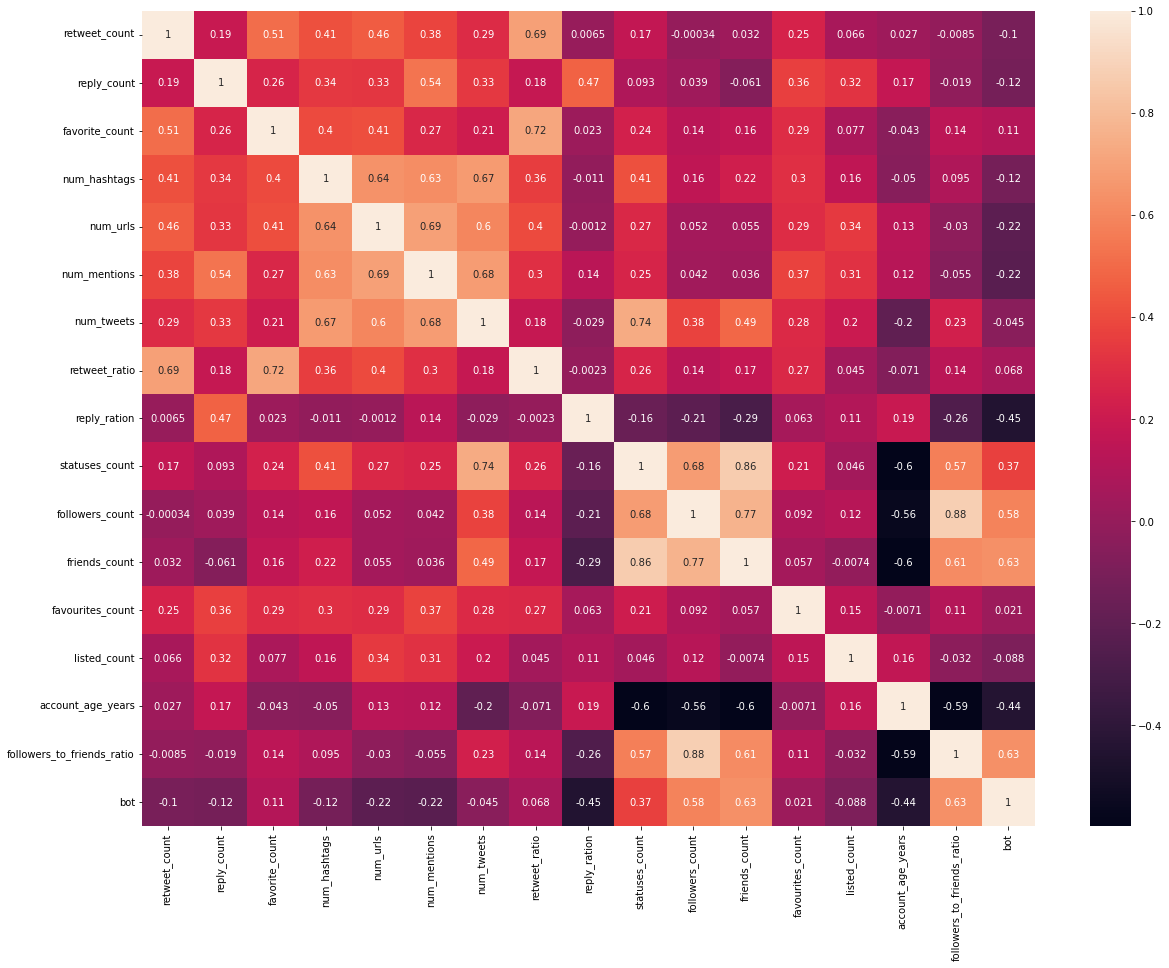

In [5]:
# Create a correlation map 
selection.correlation_map()

# 3.2 Split Data 

In [6]:
splits = importer.split_dataset(data)
splits['X_train']

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,num_tweets,retweet_ratio,reply_ration,statuses_count,followers_count,friends_count,favourites_count,listed_count,account_age_years,followers_to_friends_ratio
623,3.733885e-07,0.001673,0.000000,0.000000,0.000000,0.024927,0.022176,1.910836e-07,0.002260,0.002294,0.004926,0.220972,0.001307,0.000000,0.333333,0.005366
971,6.925976e-02,0.021818,0.053213,0.068966,0.000000,0.153846,0.423077,7.964872e-02,0.024000,0.571429,0.296296,0.663265,0.000000,0.000000,0.000000,0.334283
600,0.000000e+00,0.000000,0.000000,0.002134,0.000000,0.000000,0.017634,0.000000e+00,0.000000,0.015863,0.191781,0.174174,0.000000,0.000000,0.250000,0.251437
67,6.469048e-06,0.001294,0.000306,0.004772,0.009873,0.001601,0.011011,1.395389e-05,0.090819,0.000748,0.001639,0.004578,0.000129,0.001316,0.714286,0.001311
108,8.409762e-04,0.002912,0.000000,0.007090,0.112482,0.032456,0.137252,1.474135e-04,0.016606,0.007962,0.003811,0.007769,0.000000,0.002632,0.714286,0.001803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,3.881429e-05,0.000971,0.000459,0.009545,0.009873,0.004891,0.088400,1.055706e-05,0.008589,0.005121,0.001791,0.000882,0.000387,0.002632,0.714286,0.007165
818,4.071063e-01,0.000000,0.930413,0.344828,0.250000,0.153846,0.423077,4.681723e-01,0.000000,0.571429,0.481481,0.714286,0.000000,0.000000,0.000000,0.504409
152,4.290111e-02,0.007441,0.001989,0.082629,0.197461,0.047217,0.184553,5.594279e-03,0.031569,0.012273,0.010253,0.026079,0.001097,0.001316,0.571429,0.001450
953,0.000000e+00,0.000000,0.000000,0.103448,0.000000,0.000000,0.384615,0.000000e+00,0.000000,0.542857,0.296296,0.799320,0.000000,0.000000,0.000000,0.277384


# 4.- Sample Model 

In [7]:
tester = ModelTester(splits, features)

Single Model Prediction

In [8]:
# Create a prediction for each model 
svm_predictions = tester.predict_model('svm')

All Models Predictions

In [9]:
predictions = {}
for model in tester.models.keys():
    print(model)
    predictions[model] = tester.predict_model(model)

decision_tree
knn
logistic_regression
svm


c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## 5.- Evaluation

Single Model Evaluation

In [10]:
svm_test_evaluation = Evaluate(true_values=splits['y_test'], 
                           predicted_values=svm_predictions['test_predictions'], 
                           predicted_probabilities=svm_predictions['test_probabilities']
                           )

svm_test_evaluation.get_all_metrics()

{'Accuracy': 0.9949748743718593,
 'TN Rate': 0.35175879396984927,
 'FP Rate': 0.0,
 'FN Rate': 0.005025125628140704,
 'TP Rate': 0.6432160804020101,
 'Precision': 1.0,
 'Recall': 0.9922480620155039,
 'F1 Score': 0.9961089494163424,
 'MCC': 0.9890767094610934,
 'AUC': 1.0}

Multiple models evaluation

In [11]:
for model in predictions:
    print(model)
    test_evaluation = Evaluate(true_values=splits['y_test'], 
                           predicted_values=predictions[model]['test_predictions'], 
                           predicted_probabilities=predictions[model]['test_probabilities']
                           )

    print(f"{test_evaluation.get_all_metrics()}\n\n")


decision_tree
{'Accuracy': 1.0, 'TN Rate': 0.35175879396984927, 'FP Rate': 0.0, 'FN Rate': 0.0, 'TP Rate': 0.6482412060301508, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'MCC': 1.0, 'AUC': 1.0}


knn
{'Accuracy': 0.9849246231155779, 'TN Rate': 0.35175879396984927, 'FP Rate': 0.0, 'FN Rate': 0.01507537688442211, 'TP Rate': 0.6331658291457286, 'Precision': 1.0, 'Recall': 0.9767441860465116, 'F1 Score': 0.988235294117647, 'MCC': 0.9677830407778403, 'AUC': 1.0}


logistic_regression
{'Accuracy': 0.6482412060301508, 'TN Rate': 0.0, 'FP Rate': 0.35175879396984927, 'FN Rate': 0.0, 'TP Rate': 0.6482412060301508, 'Precision': 0.6482412060301508, 'Recall': 1.0, 'F1 Score': 0.7865853658536586, 'MCC': 0.0, 'AUC': 0.9798449612403102}


svm
{'Accuracy': 0.9949748743718593, 'TN Rate': 0.35175879396984927, 'FP Rate': 0.0, 'FN Rate': 0.005025125628140704, 'TP Rate': 0.6432160804020101, 'Precision': 1.0, 'Recall': 0.9922480620155039, 'F1 Score': 0.9961089494163424, 'MCC': 0.9890767094610934, 'AUC

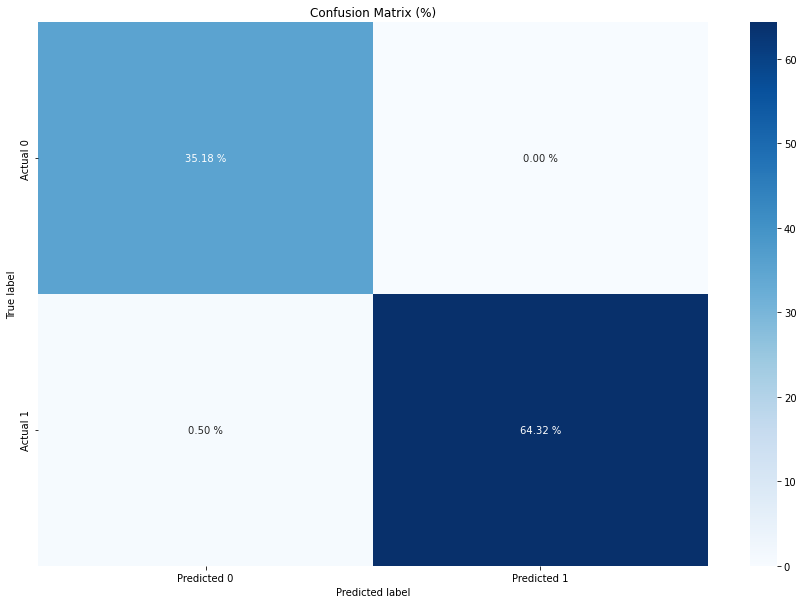

In [12]:
# Plotting the confusion matrix and ROC curve
svm_test_evaluation.plot_confusion_matrix()

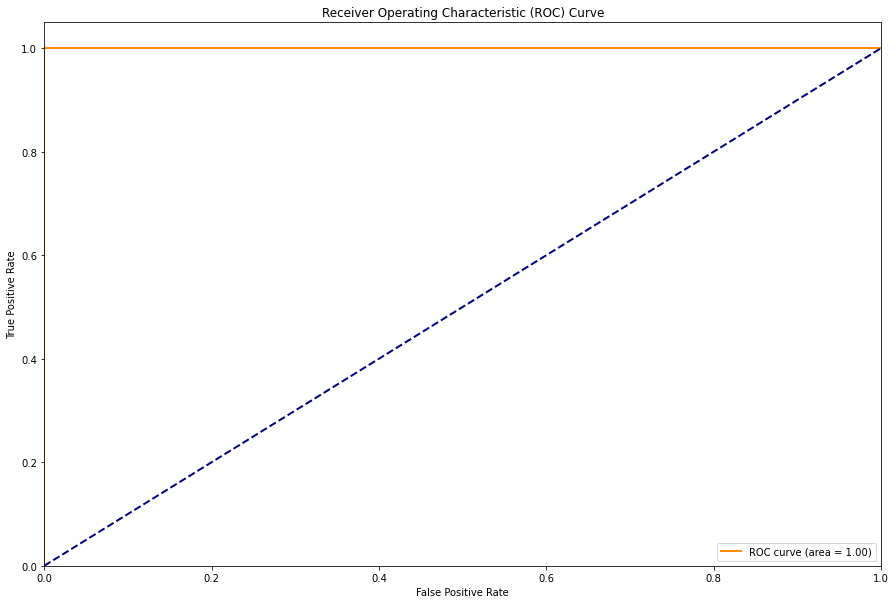

In [13]:
svm_test_evaluation.plot_roc_curve()